# AGE VS SALARY
  Developed a predictive model using Simple Linear Regression to estimate salary based on age. The project involved the following steps:

 1. Data Exploration: Loaded and visualized the dataset, identifying key relationships between age and salary using scatter plots and correlation analysis.

 2. Data Preprocessing: Cleaned the data by handling missing values and outliers, and standardized the features to improve model efficiency.

 3. Model Training: Split the dataset into training and testing sets, then trained a linear regression model to capture the relationship between age and salary.

 4. Prediction and Evaluation: Used the trained model to predict salaries for new age values. Evaluated the model using Mean Squared Error (MSE) and R-squared (R²) to measure performance and accuracy.

This project demonstrates my ability to apply regression techniques for real-world prediction tasks, providing insights into salary trends based on age.



# IMPORT LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


# DATA EXPLORATION

### FORESIGHT DATASET 

In [11]:
df = pd.read_csv('Age_Salary.csv')
df

,Age,Salary
0,58,28111.34
1,48,21948.08
2,34,22898.58
3,27,9008.96
4,40,24173.98
...,...,...
95,28,19953.64
96,27,19996.98
97,31,11164.27
98,53,29588.20


### FIRST FEW ROWS 

In [14]:
df.head()

,Age,Salary
0,58,28111.34
1,48,21948.08
2,34,22898.58
3,27,9008.96
4,40,24173.98


### LAST FEW RAWS 

In [16]:
df.tail()

,Age,Salary
95,28,19953.64
96,27,19996.98
97,31,11164.27
98,53,29588.20
99,52,32085.35


### STATISTICAL INFO ABOUT DATA

In [20]:
df.describe()

,Age,Salary
count,100.000000,100.00000
mean,38.790000,19826.73310
std,11.556008,8091.07621
min,20.000000,2888.43000
25%,28.000000,13013.77000
50%,39.500000,19498.93500
75%,47.250000,26469.69250
max,59.000000,46361.48000


### MISSING VALUE

In [23]:
df.isnull().sum()

'''
import missingno as msno
msno.bar(data)
plt.show()
'''

'\nimport missingno as msno\nmsno.bar(data)\nplt.show()\n'

### FINDING DUPLICATE VALUE

In [26]:
df.duplicated().sum()

0

### DISTRIBUTION OF DATA

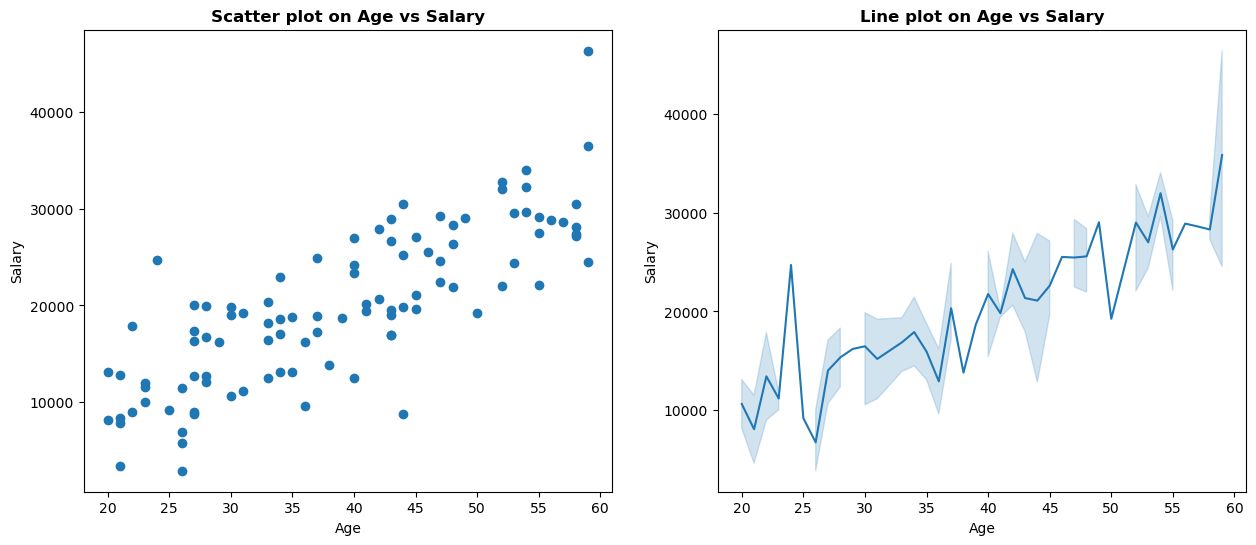

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(df['Age'],df['Salary'])
plt.title('Scatter plot on Age vs Salary',fontsize = 12, fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.subplot(1,2,2)
sns.lineplot(x= 'Age',y= 'Salary', data=df)
plt.title('Line plot on Age vs Salary',fontsize = 12, fontweight = 'bold')
plt.show()

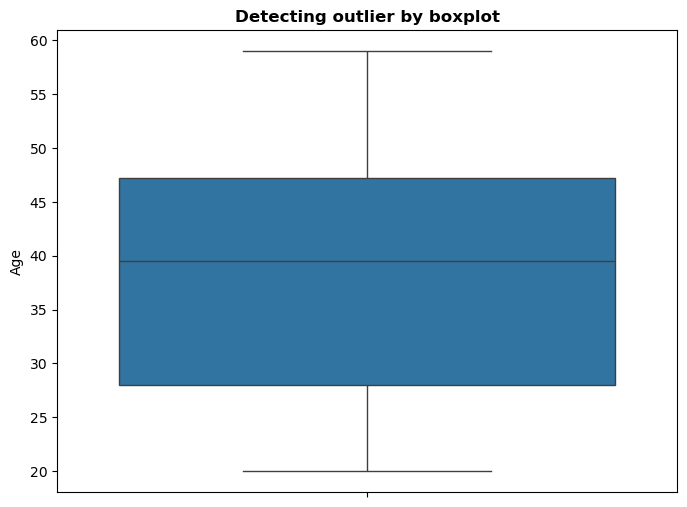

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['Age'])
plt.title('Detecting outlier by boxplot',fontsize = 12, fontweight = 'bold')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

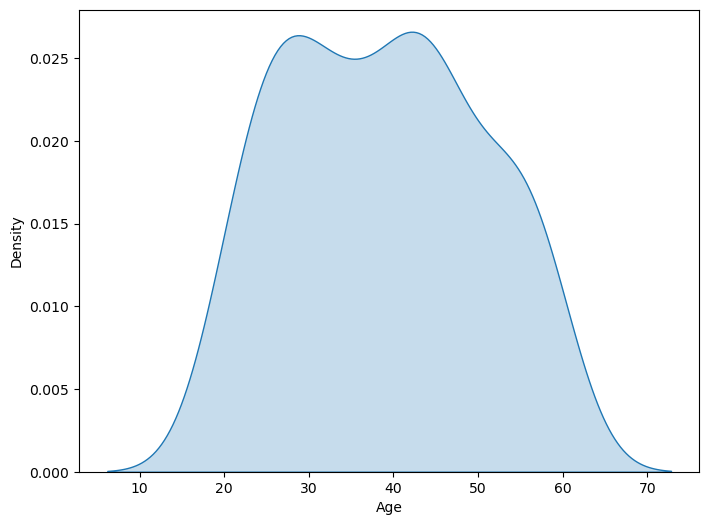

In [31]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Age'],fill = 'True')

### CORRELATION AMONG DATA 

In [33]:
corr = df.corr()

Text(0.5, 1.0, 'Correlation HeatMap')

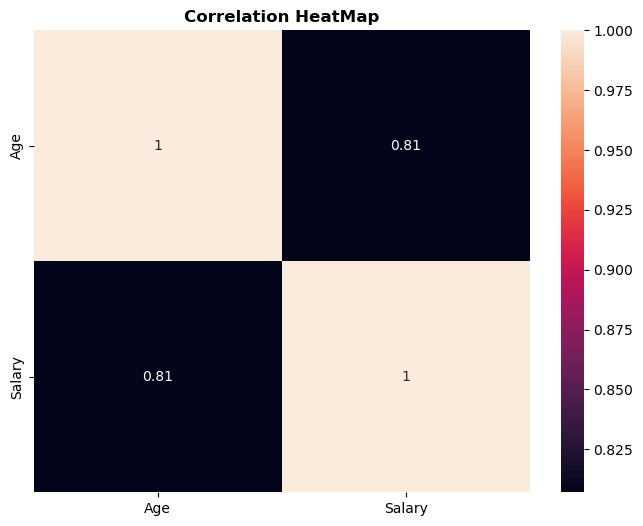

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True)
plt.title('Correlation HeatMap',fontsize=12, fontweight='bold')

# DATA PREPROCESSING

### SPLITTING DATASET INTO TRAIN & TEST 

In [37]:
#INDEPENDENT FEATURE
X = df[['Age']]

#DEPENDENT FEATURE
y = df['Salary']

#splitting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### STANDARDIZATION PROCESS 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL TRAINING & EVALUATION

### LINEAR REGRESSION BY GRADEINT DESCENT

In [42]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [43]:
print('Coefficient or Slope : ',regression.coef_)
print('Intercept : ', regression.intercept_)

Coefficient or Slope :  [5823.62298942]
Intercept :  19243.306800000002


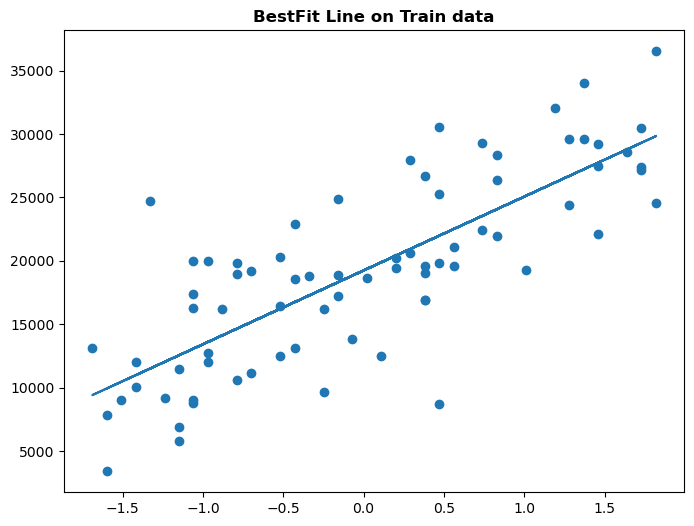

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.title('BestFit Line on Train data',fontsize = 12, fontweight= 'bold')
plt.show()

#### PREDICTION BY TEST DATA

In [46]:
y_pred = regression.predict(X_test)
y_pred

array([13077.88305374,  9935.82112189, 17267.29896286, 12554.2060651 ,
       23551.42282655, 16219.94498558, 26169.80776975, 13601.56004238,
       21456.71487199, 29311.8697016 , 24598.77680383, 10459.49811053,
       22504.06884927, 19885.68390607, 26169.80776975, 19885.68390607,
       16743.62197422,  9412.14413325, 29835.54669024, 28264.51572432,
       10983.17509918, 27217.16174703, 23027.74583791,  9935.82112189,
       19885.68390607])

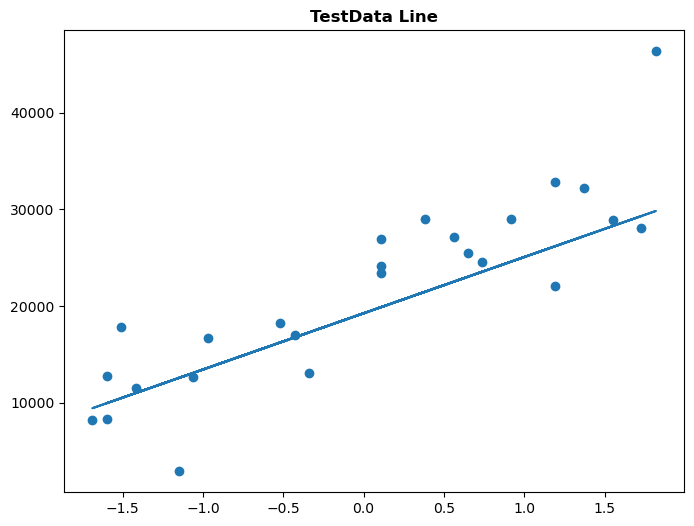

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.title('TestData Line',fontsize = 12, fontweight= 'bold')
plt.show()

#### PERFORMANCE MATRIX

In [50]:
# MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

# RSquare, adjusted RSquare
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
adjusted_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)  # On the basis of { 1 -  [(1-R2)*(N-1)/(N-K-1)] }

print(f' MSE : {mse} \n MAE : {mae} \n RMSE : {rmse} \n R2 : {score} \n adjusted R2 : {adjusted_score}')


 MSE : 29517486.68742549 
 MAE : 4088.7286654129457 
 RMSE : 5432.999787173334 
 R2 : 0.6731480846156515 
 adjusted R2 : 0.6589371317728536


### LINEAR REGRESSION BY OLS [ORIDINARY LEAST SQUARES]

In [53]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
prediction

array([-6165.42374626, -9307.48567811, -1976.00783714, -6689.1007349 ,
        4308.11602655, -3023.36181442,  6926.50096975, -5641.74675762,
        2213.40807199, 10068.5629016 ,  5355.47000383, -8783.80868947,
        3260.76204927,   642.37710607,  6926.50096975,   642.37710607,
       -2499.68482578, -9831.16266675, 10592.23989024,  9021.20892432,
       -8260.13170082,  7973.85494703,  3784.43903791, -9307.48567811,
         642.37710607])

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              6.413
Date:                Wed, 04 Dec 2024   Prob (F-statistic):                      0.0134
Time:                        18:36:21   Log-Likelihood:                         -848.36
No. Observations:                  75   AIC:                                      1699.
Df Residuals:                      74   BIC:                                      1701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5823.6230   2299.649      2.532      0.013    1241.473    1.04e+04
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.239
Skew:                           0.114   Prob(JB):                        0.887
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PREDICTION

In [58]:
regression.predict(scaler.transform([[60]]))

array([30359.22367888])

### OBSERVATION

 - Model Accuracy is 67%
 - Linear Regression is not good Fit in this data 